<a href="https://colab.research.google.com/github/elhamnadimi/Nlp-project/blob/main/NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
%matplotlib inline  
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn # make prettier graphs
import re
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
import time # to know how long training took
import multiprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#train = pd.read_csv('/content/train.csv')
#test = pd.read_csv('../input/spooky/test.csv')
traincleaned=pd.read_csv('/content/data.csv')

In [ ]:
traincleaned.drop('Unnamed: 0', axis=1,inplace=True)  
traincleaned[:3]

,id,text,author,clean_text
0,id26305,process however afforded means ascertaining di...,EAP,process however afford mean ascertain dimensio...
1,id17569,never occurred fumbling might mere mistake,HPL,never occur fumble may mere mistake
2,id11008,left hand gold snuff box capered hill cutting ...,EAP,leave hand gold snuff box capered hill cut man...


In [ ]:
traincleaned.shape

(19579, 4)

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  #text = re.sub(r"(.)\1+", "\\1", str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)





#train['text'] =  train['text'].apply(str)
#test['text'] =  test['text'].apply(str)

#train['text'] = train['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
#test['text'] = test['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

#train['text'] = train['text'].str.replace("[^a-zA-Z#]", " ")
#test['text'] = test['text'].str.replace("[^a-zA-Z#]", " ")

import re
#train.text = train.text.apply(lambda x: preprocess(x))
#test.text = test.text.apply(lambda x: preprocess(x))




import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def clean_text(text):
    '''reduce text to lower-case lexicon entry'''
    lemmas = [token.lemma_ for token in nlp(text) 
              if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'}]
    return ' '.join(lemmas)

In [ ]:
#train_sentence=traincleaned[:15663]
#print(train_sentence.shape)
#evalu = traincleaned.tail(3916)
#print(evalu.shape)

In [ ]:
X = traincleaned.clean_text
Y = traincleaned.author

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(15663,)
(3916,)


In [ ]:
data_list=X_train.apply(str).tolist()
test_list=X_test.apply(str).tolist()
test_list[:2]

['gigantic magnitude immediately available nature sum dazzle bewildered thought topic',
 'shall disturb calm mingling world']

In [ ]:
#data_list=train_sentence.clean_text.apply(str).tolist()
#test_list=evalu.clean_text.apply(str).tolist()
#test_list[:2]

In [ ]:
#data_list_1=traincleaned.clean_text.apply(str).tolist()
#train_sentence['clean_text'] = train_sentence['clean_text'].astype(str)
data_list_1=X.apply(str).tolist()


In [ ]:
#instances = traincleaned.clean_text.astype(str).apply(str.split)
instances = X.astype(str).apply(str.split)
instances.shape

(19579,)

In [ ]:
#instances2 = train_sentence.clean_text.astype(str).apply(str.split)
instances2 = X_train.astype(str).apply(str.split)

instances2.shape


(15663,)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

<Figure size 3600x720 with 0 Axes>

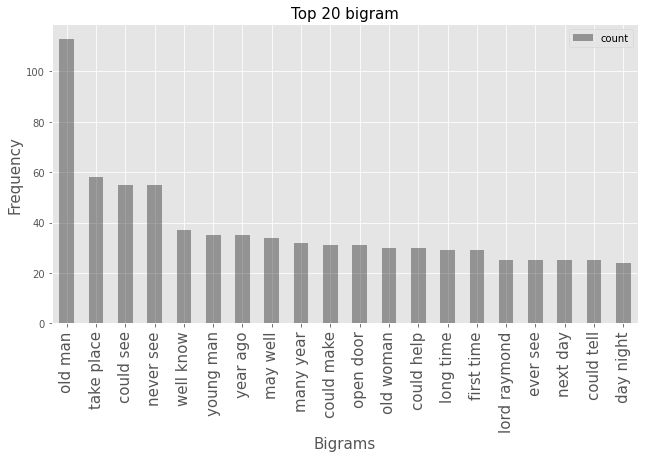

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(stop_words=stopwords.words('english'),ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(traincleaned['clean_text'].astype(str), 20)
#for word, freq in common_words:
    #print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.set_index("ReviewText", inplace = True)

#df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')
plt.figure(figsize=(50,10)) 


df3.plot(kind="bar",width=0.5, color=(0.1, 0.1, 0.1, 0.4))
plt.title("Top 20 bigram",fontsize=15)
plt.xlabel("Bigrams",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 5.5)

plt.xticks(fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

<Figure size 3600x720 with 0 Axes>

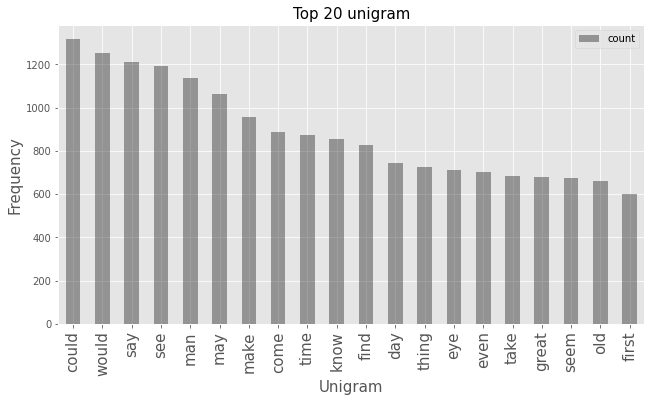

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stopwords.words('english')).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(traincleaned['clean_text'].astype(str), 20)
#for word, freq in common_words:
#    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.set_index("ReviewText", inplace = True)
#df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')
plt.figure(figsize=(50,10)) 
df2.plot(kind="bar",width=0.5, color=(0.1, 0.1, 0.1, 0.4))
plt.title("Top 20 unigram",fontsize=15)
plt.xlabel("Unigram",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 5.5)
plt.xticks(fontsize=15)

In [ ]:
tfidf = TfidfVectorizer(analyzer='word',
                        ngram_range=(1,2),min_df = 0.001,
                        max_df = 0.80,max_features = 8000,
                        stop_words = 'english',use_idf=True)
tfidf_results = tfidf.fit_transform(data_list_1)
print(tfidf_results.shape)

(19579, 2215)


In [ ]:
x_tf = tfidf_results
y_tf = traincleaned["clean_text"].values
y=traincleaned["clean_text"].astype(str)

In [ ]:
selector = SelectKBest(chi2, k=1500).fit(tfidf_results,y)
X_sel = selector.transform(tfidf_results)
print(X_sel.shape)

(19579, 1500)


In [ ]:
y.shape

(19579,)

In [ ]:
X_sel.shape

(19579, 1500)

In [ ]:
print(tfidf.vocabulary_['bad'])
print(tfidf.get_feature_names()[905])
#print(len(train_sentence[train_sentence.clean_text.str.contains('bad')]))

168
great


In [ ]:
# set number of latent components
k = 30

svd = TruncatedSVD(n_components=k)
%time U = svd.fit_transform(X_sel)
S = svd.singular_values_
V = svd.components_

CPU times: user 353 ms, sys: 226 ms, total: 579 ms
Wall time: 336 ms


In [ ]:
print(U.shape, S.shape, V.shape)



(19579, 30) (30,) (30, 1500)


In [ ]:
def show_topics(A, vocabulary, topn=5):
    """
    find the top N words for each of the latent dimensions (=rows) in a
    """
    topic_words = ([[vocabulary[i] for i in np.argsort(t)[:-topn-1:-1]]
                    for t in A]) # for each row
    return [', '.join(t) for t in topic_words]

In [ ]:
t = V[0]
topn = 10
vocabulary = tfidf.get_feature_names()
[vocabulary[i] for i in np.argsort(t)[:-topn-1:-1]]

#

['flash',
 'frightful',
 'lead',
 'interval',
 'chasm',
 'attack',
 'devotion',
 'kind',
 'aperture',
 'inhabit']

In [ ]:
vocab = tfidf.get_feature_names()

for i, comp in enumerate(svd.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[
            0],end=" ")
    print("\n")

Topic 0: 
flash frightful lead interval chasm 

Topic 1: 
flash atmosphere date enable contemplate 

Topic 2: 
frightful chasm flash partly path 

Topic 3: 
lead interval alive aperture paris 

Topic 4: 
attack lead frightful interval kind 

Topic 5: 
chasm attack lead paris kind 

Topic 6: 
interval alive chasm aperture attack 

Topic 7: 
precede flee attack aperture alive 

Topic 8: 
favourite chasm interval lead alive 

Topic 9: 
devotion precede chasm lead grotesque 

Topic 10: 
late aperture involve devotion cling 

Topic 11: 
late kind involve paris precede 

Topic 12: 
paris aperture devotion cling inhabit 

Topic 13: 
aperture kind involve cling maelzel 

Topic 14: 
kind hole devotion journey favourite 

Topic 15: 
inhabit grotesque late journey alive 

Topic 16: 
involve hole antagonist inhabit address 

Topic 17: 
journey involve occur flee alive 

Topic 18: 
grotesque drop gay hole cling 

Topic 19: 
drop address partly current decide 

Topic 20: 
grotesque maelzel address p

In [ ]:
sb.set_context('notebook')

def plot_vectors(vectors, title='VIZ', labels=None, dimensions=3):
    """
    plot the vectors in 2 or 3 dimensions. 
    If labels are supplied, use them to color the data accordingly
    """
    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('tab10') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], df2['z'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.4, 
                       s=100)
      
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            color_values = [label_colors[l]] * len(df2)
            ax.scatter(df2['x'], df2['y'], 
                       c=color_values, 
                       cmap=cMap, 
                       edgecolor='black', 
                       label=label, 
                       alpha=0.4, 
                       s=100)

    else:
        raise NotImplementedError()

    plt.title(title)
#     plt.legend()
    plt.show()

In [ ]:
from sklearn.manifold import TSNE


Z = X_sel[:400].toarray()
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(Z)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.032s...
[t-SNE] Computed neighbors for 400 samples in 0.498s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.300220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 134.378754
[t-SNE] KL divergence after 1400 iterations: 1.282907


In [ ]:
Z = X_sel[:500].toarray()
categories = traincleaned.author[:500]
X_embedded = TSNE(n_components=3).fit_transform(Z)
plot_vectors(X_embedded, title='TSNE', labels=categories, dimensions=2)

KeyboardInterrupt: ignored

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

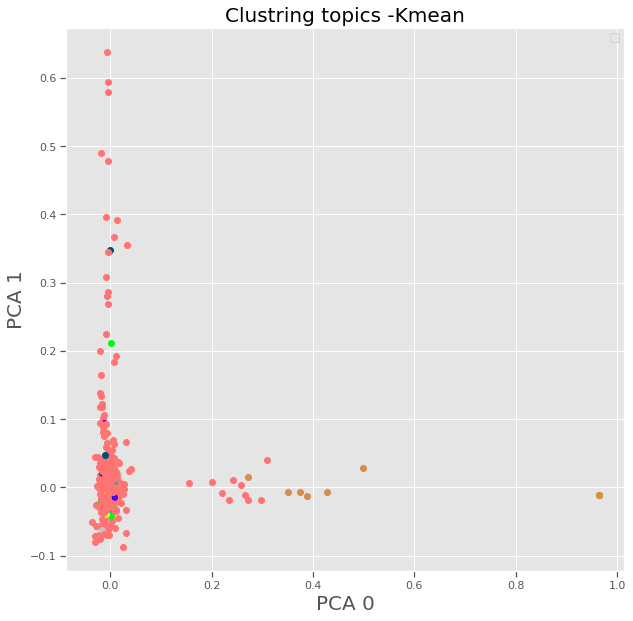

In [ ]:
num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed

# calculate tf-idf of texts
#tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
#tf_idf_matrix = tf_idf_vectorizer.fit_transform(texts_list)

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(X_sel[:1500])
# print labels

X = X_sel[:1500].todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
   
    
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
    ax.legend()
    plt.title("Clustring topics -Kmean",fontsize=20)
    plt.xlabel("PCA 0",fontsize=20)
    plt.ylabel("PCA 1",fontsize=20)
    
plt.show()



In [ ]:
X_features = traincleaned.iloc[:,1:23]


In [ ]:
# read in instances and create Dictionary object w information about frequencies etc. 
dictionary = Dictionary(instances)
# get rid of words that are too rare or too frequent
dictionary.filter_extremes(no_below=50, no_above=0.5)
print(dictionary, flush=True)


Dictionary(954 unique tokens: ['afford', 'aware', 'fact', 'however', 'make']...)


In [ ]:
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs", flush=True)
ldacorpus = [dictionary.doc2bow(text) for text in instances]
# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(ldacorpus)
# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[ldacorpus]

print(instances[0])
print(ldacorpus[0]) 
print(model_corpus[0])

translating corpus to IDs
tf-idf transformation
['process', 'however', 'afford', 'mean', 'ascertain', 'dimension', 'dungeon', 'may', 'make', 'circuit', 'return', 'point', 'whence', 'set', 'aware', 'fact', 'perfectly', 'uniform', 'seem', 'wall']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]
[(0, 0.3632890465933202), (1, 0.38859209071335604), (2, 0.31186493901095047), (3, 0.2660625171410812), (4, 0.20223616637406805), (5, 0.19889368340905467), (6, 0.2801705009249858), (7, 0.284963066148535), (8, 0.27591739095328516), (9, 0.22562599782962228), (10, 0.3093057386961437), (11, 0.2934332837019462)]


In [ ]:
coherence_values = []

dev_size = 14000
eval_size = 5000

for num_topics in range(5, 15):
    model = LdaMulticore(corpus=model_corpus[:dev_size], 
                         id2word=dictionary, 
                         num_topics=num_topics)

    coherencemodel_umass = CoherenceModel(model=model, 
                                          texts=instances[dev_size:dev_size+eval_size], 
                                          dictionary=dictionary, 
                                          coherence='u_mass')

    coherencemodel_cv = CoherenceModel(model=model, 
                                       texts=instances[dev_size:dev_size+eval_size], 
                                       dictionary=dictionary, 
                                       coherence='c_v')

    umass_score = coherencemodel_umass.get_coherence()
    cv_score = coherencemodel_cv.get_coherence()
    
    print(num_topics, umass_score, cv_score)
    coherence_values.append((num_topics, umass_score, cv_score))

5 -4.451518959046398 0.2357372507384999
6 -5.605921649073465 0.2695064804868165
7 -5.9626408357340575 0.2719046102285008
8 -6.955895009136461 0.30311709751059995
9 -7.279082977658167 0.3179085786952707
10 -9.225963118809865 0.39418920842744626
11 -9.72003898983277 0.398384611820202
12 -10.443588979717852 0.41655006277131995
13 -11.522947141231962 0.45247967405358297
14 -10.499371556320394 0.4233051096831425


<Figure size 3600x720 with 0 Axes>

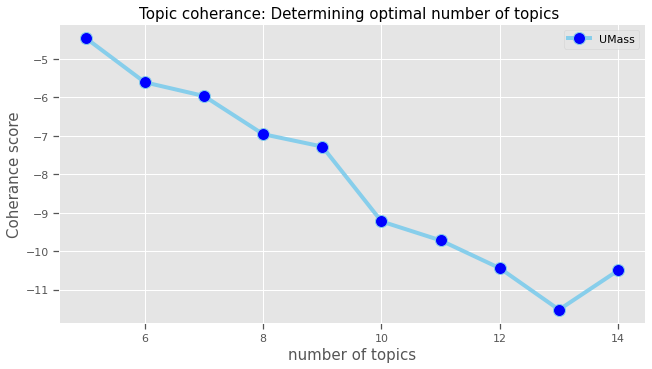

In [ ]:
plt.style.use('ggplot')

scores = pd.DataFrame(coherence_values, columns=['num_topics', 'UMass', 'CV'])

plt.figure(figsize=(50,10)) 
scores.plot(kind="line",x='num_topics',
                 y='UMass',marker='o',
            label="UMass", markerfacecolor='blue', 
            markersize=12, color='skyblue',
            linewidth=4,
            )
plt.title("Topic coherance: Determining optimal number of topics ",fontsize=15)
plt.ylabel("Coherance score",fontsize=15)
plt.xlabel("number of topics",fontsize=15)

fig = matplotlib.pyplot.gcf()

fig.set_size_inches(10.5, 5.5)

<Figure size 3600x720 with 0 Axes>

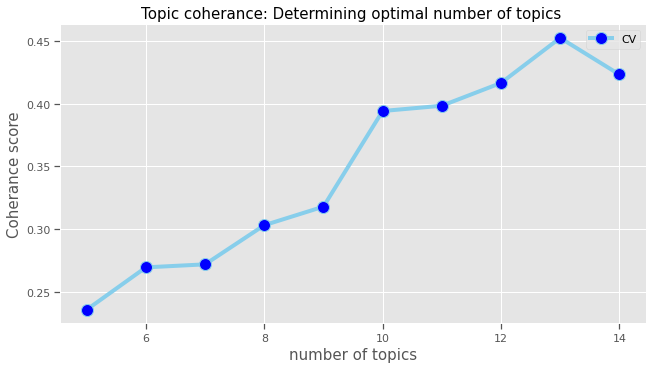

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(50,10)) 
scores.plot(kind="line",x='num_topics', y='CV',marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

plt.title("Topic coherance: Determining optimal number of topics ",fontsize=15)
plt.ylabel("Coherance score",fontsize=15)
plt.xlabel("number of topics",fontsize=15)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 5.5)

In [ ]:
num_topics = 13

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
model = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus=model_corpus, # what to train on 
                     id2word=dictionary, # mapping from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size, # update after this many instances
                     alpha=0.5
                    )
    
print("done in {}".format(time.time()-start), flush=True)

978.95
fitting model
done in 56.3603777885437


In [ ]:
# transform the data into topic distros
topic_corpus = model[model_corpus]

topic_corpus[0]

[(0, 0.050503243),
 (1, 0.050503243),
 (2, 0.050503243),
 (3, 0.0820383),
 (4, 0.06756023),
 (5, 0.050503243),
 (6, 0.050503243),
 (7, 0.078372814),
 (8, 0.05068791),
 (9, 0.07880227),
 (10, 0.0705928),
 (11, 0.07329293),
 (12, 0.2461365)]

In [ ]:
model.print_topics()


[(0,
  '0.030*"fear" + 0.030*"word" + 0.027*"would" + 0.027*"die" + 0.026*"far" + 0.026*"let" + 0.024*"lie" + 0.024*"mind" + 0.023*"nature" + 0.020*"reply"'),
 (1,
  '0.069*"come" + 0.051*"look" + 0.043*"go" + 0.042*"much" + 0.039*"tell" + 0.031*"hour" + 0.026*"could" + 0.022*"deep" + 0.020*"minute" + 0.019*"fancy"'),
 (2,
  '0.060*"man" + 0.041*"old" + 0.037*"long" + 0.031*"year" + 0.030*"death" + 0.028*"friend" + 0.028*"heart" + 0.027*"last" + 0.027*"call" + 0.024*"indeed"'),
 (3,
  '0.096*"say" + 0.057*"never" + 0.054*"take" + 0.049*"little" + 0.042*"still" + 0.031*"world" + 0.029*"soon" + 0.027*"follow" + 0.024*"hope" + 0.022*"fact"'),
 (4,
  '0.064*"make" + 0.061*"find" + 0.031*"dream" + 0.029*"could" + 0.028*"water" + 0.026*"end" + 0.022*"something" + 0.020*"put" + 0.020*"power" + 0.020*"certain"'),
 (5,
  '0.047*"must" + 0.039*"hand" + 0.038*"many" + 0.035*"yet" + 0.033*"shall" + 0.025*"city" + 0.024*"live" + 0.023*"away" + 0.020*"thought" + 0.020*"sleep"'),
 (6,
  '0.078*"see" 

In [ ]:
# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                model.print_topics(num_topics=num_topics, num_words=5)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:10]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))



1 "fear", "word", "would", "die", "far"
2 "come", "look", "go", "much", "tell"
3 "man", "old", "long", "year", "death"
4 "say", "never", "take", "little", "still"
5 "make", "find", "dream", "could", "water"
6 "must", "hand", "many", "yet", "shall"
7 "see", "house", "pass", "turn", "way"
8 "give", "first", "return", "moment", "raymond"
9 "thing", "night", "think", "place", "begin"
10 "great", "life", "good", "leave", "ever"
11 "may", "feel", "love", "become", "thus"
12 "seem", "well", "idea", "grow", "body"
13 "know", "hear", "however", "nothing", "point"


In [ ]:
target_category = 'author'
limit = 1000
# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(limit)]
# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)
# add the review category of each document (so we can aggregate)
topic_distros['category'] = traincleaned[target_category][:limit]

Text(0.5, 1.0, 'Topics per Authors')

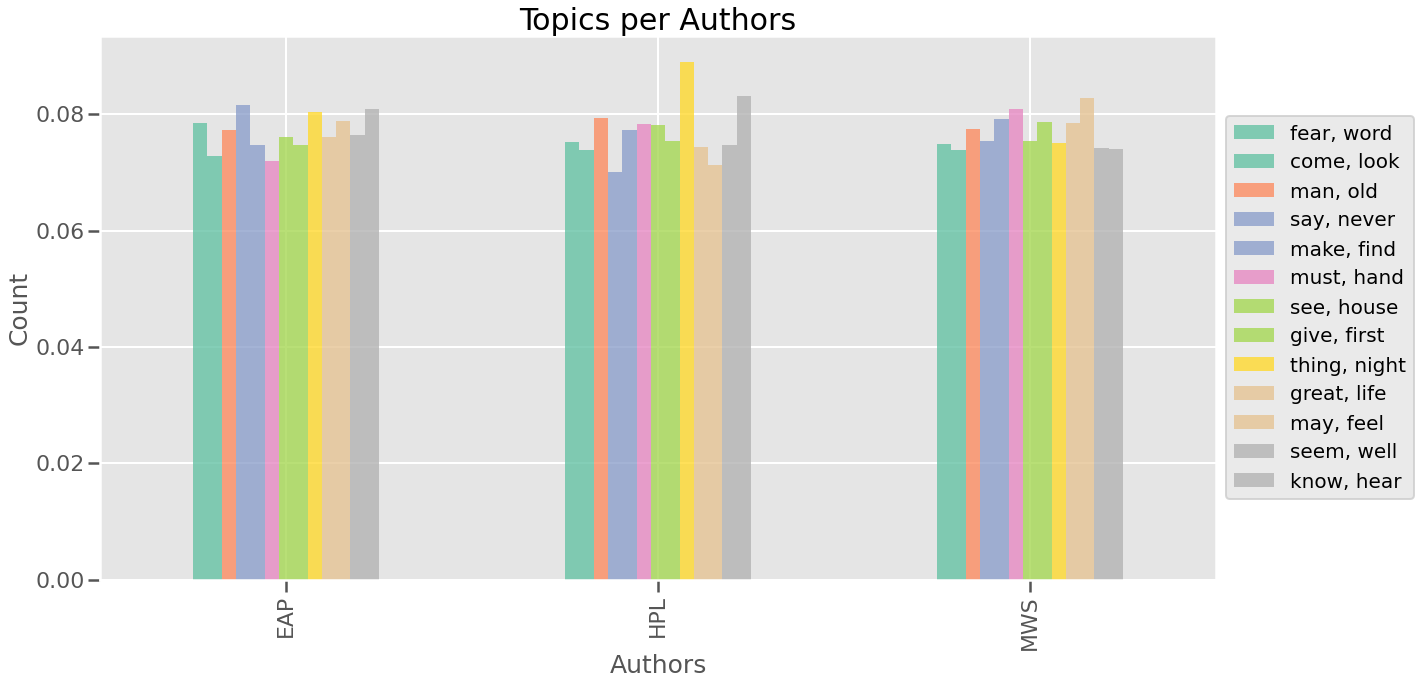

In [ ]:
import matplotlib.pyplot as plt # make graphs


seaborn.set_context('poster') # use large font

fig, ax = plt.subplots(figsize=(20, 10)) # set graph size


# aggregate topics by categories
aggregate_by_category = topic_distros[topic_distros.category.isin('EAP HPL MWS'.split())]
aggregate_by_category = aggregate_by_category.groupby(aggregate_by_category.category).mean()
# plot the graph
aggregate_by_category[descriptors].plot.bar(ax=ax,alpha=0.8,colormap="Set2");
# move the legend out
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=20);
ax.set_ylabel("Count",fontsize=25)
ax.set_xlabel("Authors",fontsize=25)
plt.title("Topics per Authors",fontsize=30)

In [ ]:
#Text classification

In [ ]:
# transform labels into numbers
labels2numbers = LabelEncoder()

y1 = labels2numbers.fit_transform(y_train)
print(y_train[:10], y1[:10], len(y1))


5107     EAP
5465     MWS
15443    MWS
9737     MWS
10192    HPL
15044    MWS
13494    MWS
15830    HPL
15170    EAP
6562     MWS
Name: author, dtype: object [0 2 2 2 1 2 2 1 0 2] 15663


In [ ]:
tfidf = TfidfVectorizer(analyzer='word',
                        ngram_range=(1,2),min_df = 0.001,
                        max_df = 0.80,max_features = 8000,
                        stop_words = 'english',use_idf=True)
tfidf_results_cl = tfidf.fit_transform(data_list)
print(tfidf_results_cl.shape)


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=1500).fit(tfidf_results_cl,y1)
X_sel_lg = selector.transform(tfidf_results_cl)
print(X_sel_lg.shape)

(15663, 2253)
(15663, 1500)


In [ ]:
labels2numbers.inverse_transform([1,1,1,0,0,1])

array(['HPL', 'HPL', 'HPL', 'EAP', 'EAP', 'HPL'], dtype=object)

In [ ]:
classifier_lg = LogisticRegression(class_weight='balanced', solver='lbfgs', multi_class='ovr')
%time classifier_lg.fit(tfidf_results_cl , y1)
print(classifier_lg)

CPU times: user 350 ms, sys: 906 µs, total: 351 ms
Wall time: 354 ms
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
coefs = classifier_lg.coef_
coefs

array([[ 4.92e-01,  6.19e-01, -2.17e-01, ..., -6.75e-01, -2.15e+00,
        -6.22e-01],
       [ 1.02e-01, -1.83e-01,  6.97e-01, ...,  8.32e-01,  1.94e+00,
         3.45e-04],
       [-5.39e-01, -5.16e-01, -4.18e-01, ..., -1.33e-01, -1.04e-01,
         5.75e-01]])

In [ ]:
k = tfidf.vocabulary_['bad'] # column position for the word
print(tfidf.get_feature_names()[k], classifier_lg.coef_[0, k])

bad -0.9516628055157841


In [ ]:
for k in [2,3,5,10,15,20]:
    cv = cross_val_score(LogisticRegression(), tfidf_results_cl, y=y1, cv=k, n_jobs=-1, scoring="accuracy")
    fold_size = tfidf_results_cl.shape[0]/k
    
    print("F1 with {} folds for bag-of-words is {}".format(k, cv.mean()))
    print("Training on {} instances/fold, testing on {}".format(fold_size*(k-1), fold_size))
    print()
    
    
scores = pd.Series(cv)
print(scores.min(), scores.mean(), scores.max())

F1 with 2 folds for bag-of-words is 0.730128208598158
Training on 7831.5 instances/fold, testing on 7831.5

F1 with 3 folds for bag-of-words is 0.7434080316669859
Training on 10442.0 instances/fold, testing on 5221.0

F1 with 5 folds for bag-of-words is 0.7496009194750074
Training on 12530.4 instances/fold, testing on 3132.6

F1 with 10 folds for bag-of-words is 0.7512612462824816
Training on 14096.699999999999 instances/fold, testing on 1566.3

F1 with 15 folds for bag-of-words is 0.7529856948187257
Training on 14618.800000000001 instances/fold, testing on 1044.2

F1 with 20 folds for bag-of-words is 0.7522215543305445
Training on 14879.85 instances/fold, testing on 783.15

0.719029374201788 0.7522215543305446 0.7854406130268199


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

most_frequent = DummyClassifier(strategy='most_frequent')

print(cross_val_score(most_frequent, tfidf_results_cl, y=y1, cv=5, n_jobs=-1, scoring="f1_micro").mean())

0.4041371483637903


In [ ]:
y1.shape

(15663,)

In [ ]:
new_y = labels2numbers.transform(y_test.astype(str))
new_y[:30]

array([0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 1])

In [ ]:
#evalu
new_X = tfidf.transform(X_test.astype(str))
new_y = labels2numbers.transform(y_test.astype(str))



# use the old classifier to predict and evaluate
new_predictions = classifier_lg.predict(new_X)
print(new_predictions)

[0 2 2 ... 1 1 1]


In [ ]:
probabilities_lg = classifier_lg.predict_proba(new_X)
print(probabilities_lg)

[[0.62 0.06 0.32]
 [0.18 0.28 0.54]
 [0.33 0.16 0.51]
 ...
 [0.12 0.6  0.28]
 [0.23 0.72 0.04]
 [0.32 0.5  0.18]]


In [ ]:
prediction_lg = classifier_lg.predict(new_X)
prediction_lg

array([0, 2, 2, ..., 1, 1, 1])

In [ ]:
prediction_lg = classifier_lg.predict(new_X)
prediction_df = pd.DataFrame(data={'author':y_test, 'new_predictions': labels2numbers.inverse_transform(prediction_lg),'truth':y_test})
prediction_df[:5]

,author,new_predictions,truth
6148,EAP,EAP,EAP
4881,MWS,MWS,MWS
16114,MWS,MWS,MWS
738,EAP,EAP,EAP
13435,HPL,HPL,HPL


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('classic')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=3)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
plt.style.use('classic')

In [ ]:
new_y2=labels2numbers.inverse_transform(new_y)
new_y2
eval_predictions_lg=labels2numbers.inverse_transform(prediction_lg)
eval_predictions_lg

array(['EAP', 'MWS', 'MWS', ..., 'HPL', 'HPL', 'HPL'], dtype=object)

Confusion matrix, without normalization
[[1139  239  192]
 [ 176  805   90]
 [ 198  131  946]]


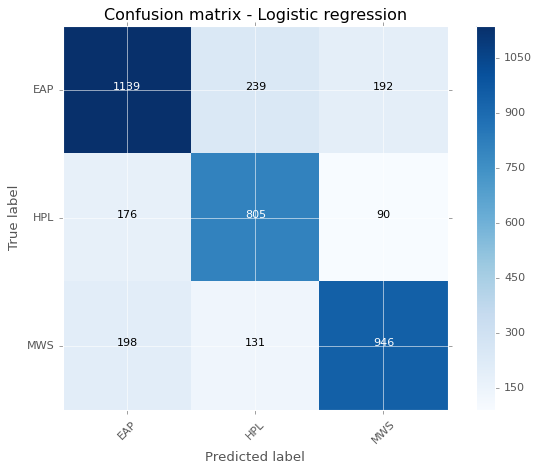

In [ ]:
plt.style.use('ggplot')

cnf_matrix = confusion_matrix(new_y2, eval_predictions_lg,labels=['EAP', 'HPL', 'MWS'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion matrix - Logistic regression')

In [ ]:
count_misclassified = (new_y != prediction_lg).sum()
print('Misclassified samples: {}'.format(count_misclassified))

accuracy = metrics.accuracy_score(new_y, prediction_lg)
print("\nPredicting with {:.2f}% accuracy".format(accuracy))

Misclassified samples: 1026

Predicting with 0.74% accuracy


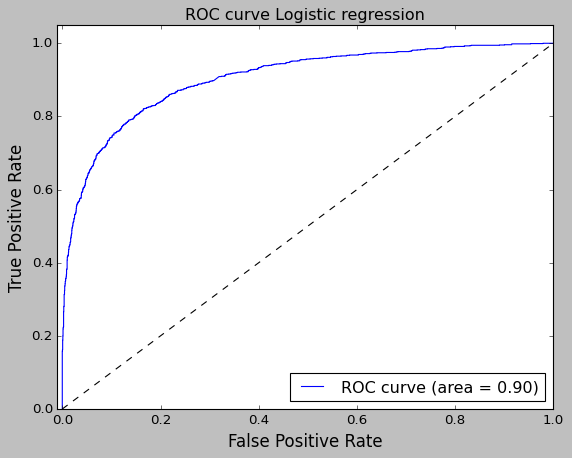

In [ ]:
#plt.style.use('ggplot')
plt.style.use('classic')

ww = label_binarize(y1, classes=[0, 1, 2])
n_classes = ww.shape[1]
new_y22=label_binarize(new_y, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(new_y22[:, i], probabilities_lg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(new_y22.ravel(), probabilities_lg.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('ROC curve Logistic regression')
plt.legend(loc="lower right")
plt.show()


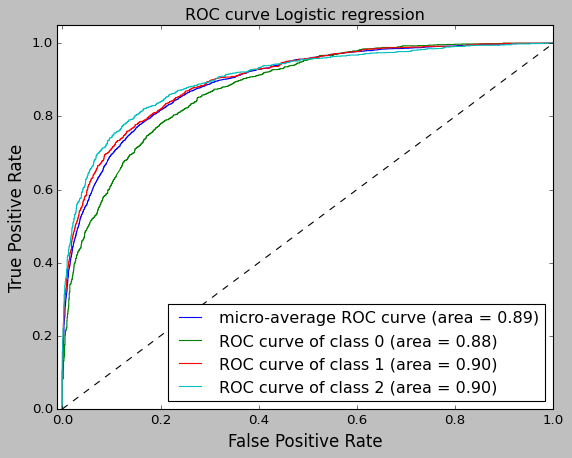

In [ ]:
plt.style.use('classic')
# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('ROC curve Logistic regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
nb = MultinomialNB()
%time nb.fit(tfidf_results_cl, y1)
print(nb)

CPU times: user 10.1 ms, sys: 921 µs, total: 11 ms
Wall time: 10.6 ms
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
coefnb = nb.coef_
coefnb

array([[-7.73, -8.1 , -7.51, ..., -8.93, -8.57, -9.4 ],
       [-7.85, -9.22, -7.44, ..., -7.62, -6.87, -8.53],
       [-8.5 , -8.96, -8.03, ..., -8.54, -7.15, -8.21]])

In [ ]:
k = tfidf.vocabulary_['bad'] # column position for the word
print(tfidf.get_feature_names()[k], nb.coef_[0, k])

bad -7.836416967460301


In [ ]:
from sklearn.model_selection import cross_val_score

for k in [2,3,5,10,15,20]:
    cv2 = cross_val_score(MultinomialNB(), tfidf_results_cl, y=y1, cv=k, n_jobs=-1, scoring="f1_micro")
    fold_size = tfidf_results_cl.shape[0]/k
    
    print("F1 with {} folds for bag-of-words is {}".format(k, cv.mean()))
    print("Training on {} instances/fold, testing on {}".format(fold_size*(k-1), fold_size))
    print()
    
    scores = pd.Series(cv2)
print(scores.min(), scores.mean(), scores.max())

F1 with 2 folds for bag-of-words is 0.7522215543305445
Training on 7831.5 instances/fold, testing on 7831.5

F1 with 3 folds for bag-of-words is 0.7522215543305445
Training on 10442.0 instances/fold, testing on 5221.0

F1 with 5 folds for bag-of-words is 0.7522215543305445
Training on 12530.4 instances/fold, testing on 3132.6

F1 with 10 folds for bag-of-words is 0.7522215543305445
Training on 14096.699999999999 instances/fold, testing on 1566.3

F1 with 15 folds for bag-of-words is 0.7522215543305445
Training on 14618.800000000001 instances/fold, testing on 1044.2

F1 with 20 folds for bag-of-words is 0.7522215543305445
Training on 14879.85 instances/fold, testing on 783.15

0.7343550446998725 0.7549029765162769 0.7867177522349936


In [ ]:
# use the old classifier to predict and evaluate, evaluation set
predictions_nb = nb.predict(new_X)
print(predictions_nb)

[0 2 2 ... 1 1 1]


In [ ]:
print(classification_report(new_y, predictions_nb))
count_misclassified_nb = (new_y != predictions_nb).sum()
print('Misclassified samples: {}'.format(count_misclassified_nb))

accuracy_nb = metrics.accuracy_score(new_y, predictions_nb)
print("\nPredicting with {:.2f}% accuracy".format(accuracy_nb))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1570
           1       0.74      0.69      0.71      1071
           2       0.79      0.73      0.76      1275

    accuracy                           0.74      3916
   macro avg       0.75      0.74      0.74      3916
weighted avg       0.75      0.74      0.74      3916

Misclassified samples: 1003

Predicting with 0.74% accuracy


In [ ]:
probabilities_nb = nb.predict_proba(new_X)
print(probabilities_nb)

[[0.73 0.08 0.19]
 [0.23 0.24 0.53]
 [0.4  0.18 0.41]
 ...
 [0.21 0.54 0.25]
 [0.24 0.69 0.07]
 [0.35 0.48 0.18]]


In [ ]:
predictions_nb = nb.predict(new_X)
prediction_df = pd.DataFrame(data={'author': y_test, 'new_predictions':
                                   labels2numbers.inverse_transform(predictions_nb),'truth':y_test})
prediction_df[:5]

,author,new_predictions,truth
6148,EAP,EAP,EAP
4881,MWS,MWS,MWS
16114,MWS,MWS,MWS
738,EAP,EAP,EAP
13435,HPL,HPL,HPL


In [ ]:
predictions_nb

array([0, 2, 2, ..., 1, 1, 1])

In [ ]:
new_predictions_nb_=labels2numbers.inverse_transform(predictions_nb)
new_predictions_nb_

array(['EAP', 'MWS', 'MWS', ..., 'HPL', 'HPL', 'HPL'], dtype=object)

In [ ]:
new_predictions_nb_


array(['EAP', 'MWS', 'MWS', ..., 'HPL', 'HPL', 'HPL'], dtype=object)

Confusion matrix, without normalization
[[1240  159  171]
 [ 252  736   83]
 [ 237  101  937]]


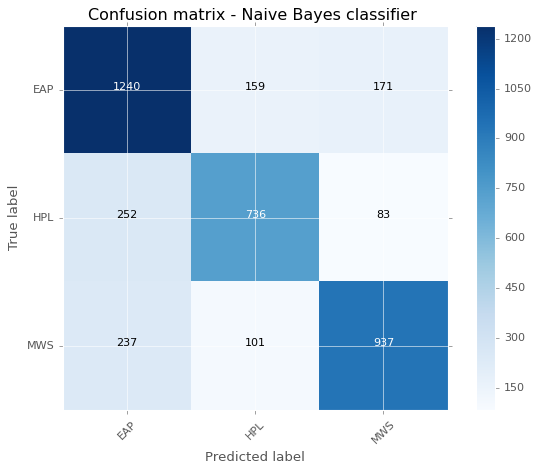

In [ ]:
plt.style.use('ggplot')
cnf_matrix = confusion_matrix(new_y2, new_predictions_nb_,labels=['EAP', 'HPL', 'MWS'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion matrix - Naive Bayes classifier ')

In [ ]:
count_misclassified = (new_y2 !=  new_predictions_nb_).sum()
print('Misclassified samples: {}'.format(count_misclassified))

accuracy = metrics.accuracy_score(new_y2,  new_predictions_nb_)
print("\nPredicting with {:.2f}% accuracy".format(accuracy))

Misclassified samples: 1003

Predicting with 0.74% accuracy


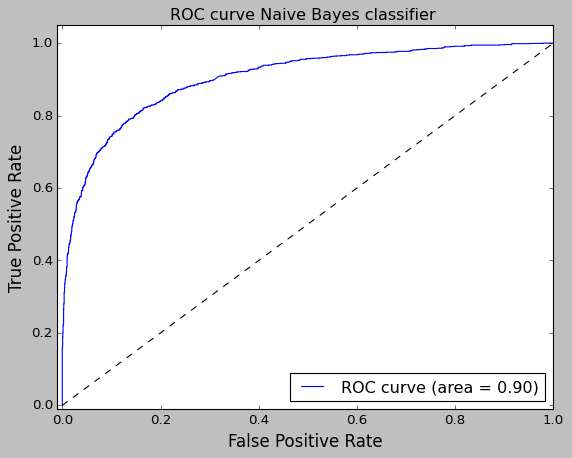

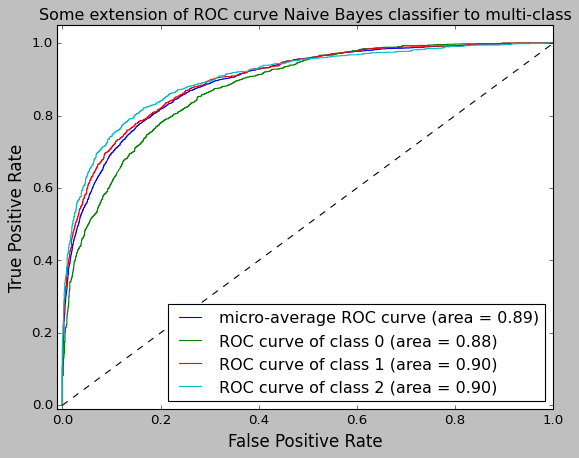

In [ ]:
plt.style.use('classic')


ww = label_binarize(y1, classes=[0, 1, 2])
n_classes = ww.shape[1]
new_y22=label_binarize(new_y, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(new_y22[:, i], probabilities_lg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(new_y22.ravel(), probabilities_lg.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('ROC curve Naive Bayes classifier ')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Some extension of ROC curve Naive Bayes classifier to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(y_train)
integer_encoded2 = label_encoder.fit_transform(y_test)


le_name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))
print("Label Encoding Classes as ")
print(le_name_mapping)


#Converts a class vector (integers) to binary class matrix.
y_train=np_utils.to_categorical(integer_encoded1,num_classes=3)
y_val=np_utils.to_categorical(integer_encoded2,num_classes=3)
print("One Hot Encoded class shape ")
print(y_train.shape)
print(y_train[0:3])

Label Encoding Classes as 
{0: 'EAP', 1: 'HPL', 2: 'MWS'}
One Hot Encoded class shape 
(15663, 3)
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
X_train0 = X_train.values.astype(str)
#y_train = df0_train['sentiment'].values

X_val0 = X_test.values.astype(str)
#y_val = df0_val['sentiment'].values
print('df_train shape: {}'.format(X_train0.shape))
print('df_val shape: {}'.format(X_val0.shape))

df_train shape: (15663,)
df_val shape: (3916,)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

TOP_K = 20000
MAX_SEQUENCE_LENGTH = 500



tokenizer = Tokenizer()
    # Create vocabulary with training texts.
tokenizer = text.Tokenizer(num_words=TOP_K)
tokenizer.fit_on_texts(X_train0)

    # Vectorize training and validation texts.
x_train = tokenizer.texts_to_sequences(X_train0)
x_val = tokenizer.texts_to_sequences(X_val0)

    # Get max sequence length.
max_length = len(max(x_train, key=len))

if max_length > MAX_SEQUENCE_LENGTH:
    max_length = MAX_SEQUENCE_LENGTH

    # Fix sequence length to max value. Sequences shorter than the length are
    # padded in the beginning and sequences longer are truncated
    # at the beginning.
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_val = sequence.pad_sequences(x_val, maxlen=max_length)
    #return x_train, x_val, tokenizer.word_index

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(max_length)
print(x_train[0])
print(X_train0[0])

(15663, 409)
(3916, 409)
409
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   

In [ ]:
tokenizer.word_index

{'could': 1,
 'would': 2,
 'say': 3,
 'see': 4,
 'man': 5,
 'may': 6,
 'make': 7,
 'come': 8,
 'time': 9,
 'know': 10,
 'find': 11,
 'day': 12,
 'eye': 13,
 'thing': 14,
 'even': 15,
 'take': 16,
 'seem': 17,
 'great': 18,
 'old': 19,
 'first': 20,
 'must': 21,
 'think': 22,
 'night': 23,
 'life': 24,
 'give': 25,
 'long': 26,
 'never': 27,
 'look': 28,
 'feel': 29,
 'little': 30,
 'many': 31,
 'become': 32,
 'place': 33,
 'hear': 34,
 'still': 35,
 'house': 36,
 'leave': 37,
 'go': 38,
 'good': 39,
 'hand': 40,
 'much': 41,
 'love': 42,
 'yet': 43,
 'year': 44,
 'word': 45,
 'tell': 46,
 'death': 47,
 'light': 48,
 'heart': 49,
 'well': 50,
 'mind': 51,
 'ever': 52,
 'speak': 53,
 'thus': 54,
 'whose': 55,
 'friend': 56,
 'form': 57,
 'far': 58,
 'fear': 59,
 'however': 60,
 'world': 61,
 'earth': 62,
 'shall': 63,
 'last': 64,
 'pass': 65,
 'head': 66,
 'open': 67,
 'door': 68,
 'dream': 69,
 'room': 70,
 'fall': 71,
 'hour': 72,
 'voice': 73,
 'way': 74,
 'appear': 75,
 'return': 76

In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
vocab_size

17666

First, we initialize the Tokenizer object which is imported from the Keras library as a token. Then fitting the tokenizer on the whole text where each word is assigned a unique number and every word is now represented by a number. The third line converts each sentence into a sequence of numbers that is assigned to in the previous line.

In [ ]:
#lets use glove word embeding:

from numpy import array
from numpy import asarray
from numpy import zeros

embeddings = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip
# load the GloVe vectors in a dictionary:
embeddings_index = {}
f = open('/content/glove.6B.100d.txt', encoding='utf8')
for line in tqdm(f):
    values = line.split()
    word = ''.join(values[:-100])
    coefs = np.asarray(values[-100:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

words = ['sad']
for w in words:
    if w in embeddings_index.keys():
        print('Found the word {} in the dictionary'.format(w))
        





400000it [00:12, 32662.66it/s]

Found 400000 word vectors.
Found the word sad in the dictionary


In [ ]:
embedding_matrix = np.zeros((vocab_size,100))
for word,i in tqdm(tokenizer.word_index.items()):
    embedding_value = embeddings_index.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

100%|██████████| 17665/17665 [00:00<00:00, 239287.88it/s]


In [ ]:
print(embedding_matrix.shape)

(17666, 100)


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend(loc='lower center')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.regularizers import l2

embedding_vector_length = 100

model1 = Sequential(name="LSTM")
model1.add(Embedding(len(tokenizer.word_index) + 1,100,
                     weights=[embedding_matrix],
                     input_length=409,
                     )) 
model1.add(SpatialDropout1D(0.3))


model1.add(LSTM(64,return_sequences=False,dropout=0.4,
                kernel_regularizer=regularizers.l2(l=0.016)))
model1.add(Dropout(0.6))
model1.add(Dense(3, activation='softmax',name= "Dense",
                 kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01)))
model1.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model1.summary())



Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 409, 100)          1766600   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 409, 100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
Dense (Dense)                (None, 3)                 195       
Total params: 1,809,035
Trainable params: 1,809,035
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history1 = model1.fit(x_train, y_train,
 batch_size=100,
 epochs=100,
 validation_data=(x_val, y_val),
 callbacks=[es])
#We save this model so that we can use in own web app


Epoch 1/100
157/157 [==============================] - 81s 518ms/step - loss: 1.7391 - accuracy: 0.4827 - val_loss: 1.0019 - val_accuracy: 0.6090
Epoch 2/100
157/157 [==============================] - 80s 512ms/step - loss: 0.9594 - accuracy: 0.6073 - val_loss: 0.8026 - val_accuracy: 0.6859
Epoch 3/100
157/157 [==============================] - 80s 513ms/step - loss: 0.8332 - accuracy: 0.6648 - val_loss: 0.7153 - val_accuracy: 0.7270
Epoch 4/100
157/157 [==============================] - 80s 511ms/step - loss: 0.7384 - accuracy: 0.7127 - val_loss: 0.6640 - val_accuracy: 0.7482
Epoch 5/100
157/157 [==============================] - 81s 514ms/step - loss: 0.6734 - accuracy: 0.7469 - val_loss: 0.6265 - val_accuracy: 0.7666
Epoch 6/100
157/157 [==============================] - 81s 514ms/step - loss: 0.6116 - accuracy: 0.7757 - val_loss: 0.6082 - val_accuracy: 0.7760
Epoch 7/100
157/157 [==============================] - 80s 511ms/step - loss: 0.5640 - accuracy: 0.7928 - val_loss: 0.5730 -

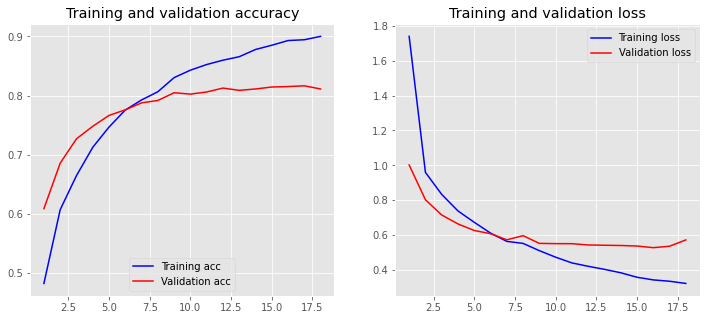

In [ ]:
plot_history(history1)

In [ ]:
plot_history(history1)

In [ ]:
#here I trained with glove embedings and the results is poor.
#so in the next models I didnt run the model with glove embedings.
from keras.models import *
from keras.layers import *
from keras.callbacks import *
embedding_vector_length = 100

g = Sequential(name="LSTM")
g.add(Embedding(len(tokenizer.word_index) + 1,
                100,weights=[embedding_matrix],
                input_length=409,
                trainable=False)) 

g.add(LSTM(100,return_sequences=False,dropout=0.2,
           kernel_regularizer=regularizers.l2(l=0.03)))
g.add(Dropout(0.5))
g.add(Dense(3, activation='softmax',kernel_regularizer=l2(0.01),
            bias_regularizer=l2(0.01)))
g.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(g.summary())


from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
historyg = g.fit(x_train, y_train,
 batch_size=16,
 epochs=200,
 validation_data=(x_val, y_val),
 callbacks=[es])





Model: "LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 409, 100)          1766600   
_________________________________________________________________
lstm_21 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 303       
Total params: 1,847,303
Trainable params: 80,703
Non-trainable params: 1,766,600
_________________________________________________________________
None
Epoch 1/200
979/979 [==============================] - 17s 18ms/step - loss: 1.2520 - accuracy: 0.5572 - val_loss: 0.9794 - val_accuracy: 0.5917
Epoch 2/200
979/979 [==============================] - 16s 16ms/step - loss: 1.0296 - accuracy:

KeyboardInterrupt: ignored

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers import GlobalMaxPooling1D, Dropout,MaxPool1D
from keras.layers.core import Dense, Activation
from keras.layers import concatenate

#from tensorflow.keras import layers
#from tensorflow.keras import regularizers

from keras.regularizers import l2


#opt = keras.optimizers.Adam(learning_rate=0.001)
np.random.seed(42)
#You needs to reshape your input data according to Conv1D layer input format - (batch_size, steps, input_dim). Try


# set parameters of matrices and convolution
embedding_dim = 100
nb_filter = 64
filter_length = 5
hidden_dims = 32
stride_length = 1

from keras.layers import Embedding

embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            input_length=409,
                            name="Embedding")
inp = Input(shape=(409,), dtype='int32')
embeddings = embedding_layer(inp)



conv1 = Conv1D(filters=32,  # Number of filters to use
                    kernel_size=filter_length, # n-gram range of each filter.
                    padding='same',  #valid: don't go off edge; same: use padding before applying filter
                    activation='relu',
                    name="CONV1",
                    kernel_regularizer=regularizers.l2(l=0.0367))(embeddings)

conv2 = Conv1D(filters=32,  # Number of filters to use
                    kernel_size=filter_length, # n-gram range of each filter.
                    padding='same',  #valid: don't go off edge; same: use padding before applying filter
                    activation='relu',
                    name="CONV2",kernel_regularizer=regularizers.l2(l=0.02))(embeddings)



max1 = MaxPool1D(100, strides=1,name="MaxPool1D1")(conv1)
max2 = MaxPool1D(100, strides=1,name="MaxPool1D2")(conv2)


conc = concatenate([max1, max2])
flat = Flatten(name="FLATTEN")(max1)
drop = Dropout(0.55,name="Dropout")(flat)
out =  Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(l=0.0368),bias_regularizer=regularizers.l2(l=0.016),name="Dense")(drop)
#adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)


model4 = Model(inputs=[inp], outputs=[out],name="CNN")
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model4.summary()



Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 409)]             0         
_________________________________________________________________
Embedding (Embedding)        (None, 409, 100)          1766600   
_________________________________________________________________
CONV1 (Conv1D)               (None, 409, 32)           16032     
_________________________________________________________________
MaxPool1D1 (MaxPooling1D)    (None, 310, 32)           0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 9920)              0         
_________________________________________________________________
Dropout (Dropout)            (None, 9920)              0         
_________________________________________________________________
Dense (Dense)                (None, 3)                 29763   

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)
history4 = model4.fit(x_train, y_train,
 batch_size=16,
 epochs=100,
 validation_data=(x_val, y_val),
 callbacks=[es])




Epoch 1/100
979/979 [==============================] - 81s 82ms/step - loss: 1.0870 - accuracy: 0.6086 - val_loss: 0.8455 - val_accuracy: 0.7242
Epoch 2/100
979/979 [==============================] - 81s 83ms/step - loss: 0.7400 - accuracy: 0.7826 - val_loss: 0.7308 - val_accuracy: 0.7735
Epoch 3/100
979/979 [==============================] - 81s 83ms/step - loss: 0.5890 - accuracy: 0.8507 - val_loss: 0.7067 - val_accuracy: 0.7863
Epoch 4/100
979/979 [==============================] - 81s 82ms/step - loss: 0.5081 - accuracy: 0.8873 - val_loss: 0.6818 - val_accuracy: 0.8041
Epoch 5/100
979/979 [==============================] - 81s 82ms/step - loss: 0.4477 - accuracy: 0.9112 - val_loss: 0.6814 - val_accuracy: 0.7990
Epoch 6/100
979/979 [==============================] - 82s 84ms/step - loss: 0.4114 - accuracy: 0.9260 - val_loss: 0.6921 - val_accuracy: 0.8013
Epoch 00006: early stopping


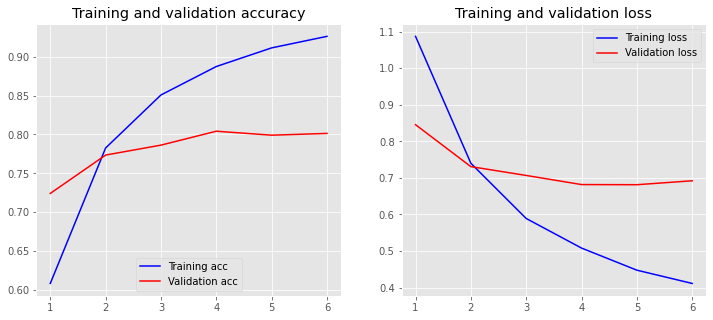

In [ ]:
plot_history(history4)

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers import GlobalMaxPooling1D, Dropout,MaxPool1D
from keras.layers.core import Dense, Activation
from keras.layers import concatenate

#from tensorflow.keras import layers
#from tensorflow.keras import regularizers

from keras.regularizers import l2


#opt = keras.optimizers.Adam(learning_rate=0.001)
np.random.seed(42)
#You needs to reshape your input data according to Conv1D layer input format - (batch_size, steps, input_dim). Try


# set parameters of matrices and convolution
embedding_dim = 100
nb_filter = 64
filter_length = 5
hidden_dims = 32
stride_length = 1

from keras.layers import Embedding

embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            embedding_dim,
                            input_length=409,
                            name="Embedding")
inp = Input(shape=(409,), dtype='int32')
embeddings = embedding_layer(inp)



conv1 = Conv1D(filters=32,  # Number of filters to use
                    kernel_size=filter_length, # n-gram range of each filter.
                    padding='same',  #valid: don't go off edge; same: use padding before applying filter
                    activation='relu',
                    name="CONV1",
                    kernel_regularizer=regularizers.l2(l=0.0367))(embeddings)

conv2 = Conv1D(filters=32,  # Number of filters to use
                    kernel_size=filter_length, # n-gram range of each filter.
                    padding='same',  #valid: don't go off edge; same: use padding before applying filter
                    activation='relu',
                    name="CONV2",kernel_regularizer=regularizers.l2(l=0.02))(embeddings)

conv3 = Conv1D(filters=32,  # Number of filters to use
                    kernel_size=filter_length, # n-gram range of each filter.
                    padding='same',  #valid: don't go off edge; same: use padding before applying filter
                    activation='relu',
                    name="CONV2",kernel_regularizer=regularizers.l2(l=0.01))(embeddings)


max1 = MaxPool1D(100, strides=1,name="MaxPool1D1")(conv1)
max2 = MaxPool1D(100, strides=1,name="MaxPool1D2")(conv2)
max3 = MaxPool1D(100, strides=1,name="MaxPool1D2")(conv3)

conc = concatenate([max1, max2,max3])
flat = Flatten(name="FLATTEN")(max1)
drop = Dropout(0.55,name="Dropout")(flat)
out =  Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(l=0.0268),bias_regularizer=regularizers.l2(l=0.016),name="Dense")(drop)
#adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)


modelt = Model(inputs=[inp], outputs=[out],name="CNN")
modelt.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelt.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)
historyt = modelt.fit(x_train, y_train,
 batch_size=32,
 epochs=100,
 validation_data=(x_val, y_val),
 callbacks=[es])




Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 409)]             0         
_________________________________________________________________
Embedding (Embedding)        (None, 409, 100)          1766600   
_________________________________________________________________
CONV1 (Conv1D)               (None, 409, 32)           16032     
_________________________________________________________________
MaxPool1D1 (MaxPooling1D)    (None, 310, 32)           0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 9920)              0         
_________________________________________________________________
Dropout (Dropout)            (None, 9920)              0         
_________________________________________________________________
Dense (Dense)                (None, 3)                 29763   

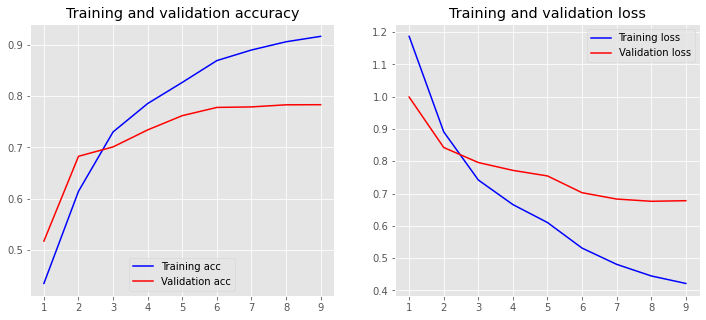

In [ ]:
plot_history(historyt)

In [ ]:
max_len = 409
max_words = 17666
emb_dim = 100
from keras.regularizers import l2


model6 = Sequential(name="BI-LSTM")
model6.add(Embedding(max_words,emb_dim,weights=[embedding_matrix],input_length=max_len,name="Embedding"))
model6.add(Bidirectional(LSTM(32,
                              return_sequences=False,
                              dropout=0.5,
                              recurrent_dropout=0.5, name="BI-LSTM",
                              kernel_regularizer='l2')))
model6.add(Dropout(0.5,name= "Dropout"))
model6.add(Dense(3, activation='softmax',name= "Dense",
                 kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model6.summary()
#kernel_regularizer='l2',recurrent_regularizer='l2',bias_regularizer='l2',

Model: "BI-LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 409, 100)          1766600   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                34048     
_________________________________________________________________
Dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
Dense (Dense)                (None, 3)                 195       
Total params: 1,800,843
Trainable params: 1,800,843
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history6=model6.fit(x_train, y_train,
 batch_size=64,
 epochs=30,
 validation_data=(x_val, y_val),
 callbacks=[es])


Epoch 1/30
245/245 [==============================] - 265s 1s/step - loss: 1.5758 - accuracy: 0.5065 - val_loss: 0.9222 - val_accuracy: 0.6522
Epoch 2/30
245/245 [==============================] - 267s 1s/step - loss: 0.8970 - accuracy: 0.6511 - val_loss: 0.7637 - val_accuracy: 0.7263
Epoch 3/30
245/245 [==============================] - 259s 1s/step - loss: 0.7606 - accuracy: 0.7248 - val_loss: 0.6752 - val_accuracy: 0.7579
Epoch 4/30
245/245 [==============================] - 263s 1s/step - loss: 0.6548 - accuracy: 0.7772 - val_loss: 0.6330 - val_accuracy: 0.7827
Epoch 5/30
245/245 [==============================] - 263s 1s/step - loss: 0.5883 - accuracy: 0.8097 - val_loss: 0.6029 - val_accuracy: 0.7937
Epoch 6/30
245/245 [==============================] - 258s 1s/step - loss: 0.5222 - accuracy: 0.8354 - val_loss: 0.5826 - val_accuracy: 0.7990
Epoch 7/30
245/245 [==============================] - 259s 1s/step - loss: 0.4830 - accuracy: 0.8517 - val_loss: 0.5954 - val_accuracy: 0.8057

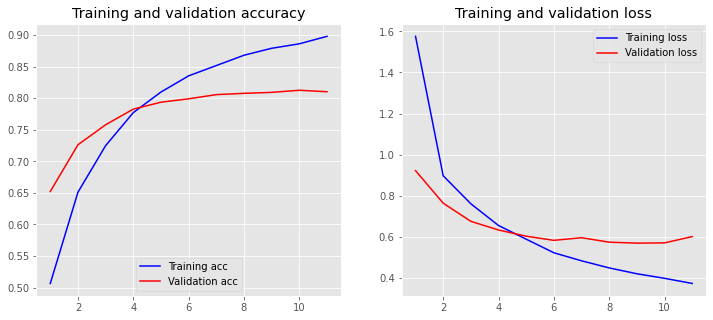

In [ ]:
plot_history(history6)

In [ ]:
y_score = model6.predict(x_val,verbose=1)
y_score

123/123 [==============================] - 10s 80ms/step


array([[0.9927376 , 0.0047081 , 0.00255437],
       [0.13808624, 0.12492584, 0.7369879 ],
       [0.01872116, 0.0068656 , 0.9744133 ],
       ...,
       [0.00671249, 0.9877604 , 0.00552706],
       [0.03818827, 0.95588994, 0.00592176],
       [0.9246277 , 0.06263573, 0.01273654]], dtype=float32)

In [ ]:
vv=np_utils.to_categorical(y_score,num_classes=3)
vv

array([[[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       ...,

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]], dtype=float32)

In [ ]:
y_score2 = model6.predict_classes(x_val,verbose=1)
y_score2

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
123/123 [==============================] - 9s 77ms/step


array([0, 2, 2, ..., 1, 1, 0])

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[1351  106  113]
 [ 191  828   52]
 [ 226   55  994]]


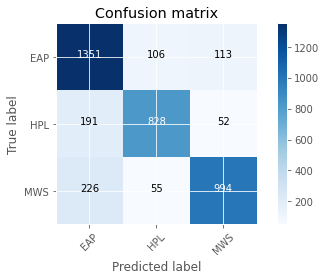

In [ ]:
rr=label_encoder.inverse_transform(integer_encoded2)

uu=label_encoder.inverse_transform(y_score2)
plt.style.use('ggplot')



cnf_matrix = confusion_matrix(rr, uu,labels=['EAP', 'HPL', 'MWS'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['EAP', 'HPL', 'MWS'],
                      title='Confusion matrix')

In [ ]:
from keras.utils import to_categorical
# data labels = [1, 2, 1...]
#labels_index = { "website" : 0, "money" : 1 ....} 
print(le_name_mapping)

tt=np.vectorize(le_name_mapping.get)(y_score2)
tt

{0: 'EAP', 1: 'HPL', 2: 'MWS'}


array(['EAP', 'MWS', 'MWS', ..., 'HPL', 'HPL', 'EAP'], dtype='<U3')

In [ ]:
prediction_model2 = model6.predict(x_val)
prediction_model2 = pd.DataFrame(data={'author': y_test, 'new_predictions': label_encoder.inverse_transform(y_score2),'truth':y_test})
prediction_model2[:4]

,author,new_predictions,truth
6148,EAP,EAP,EAP
4881,MWS,MWS,MWS
16114,MWS,MWS,MWS
738,EAP,EAP,EAP


In [ ]:
probabilities = model6.predict_proba(x_val,verbose=1)
print(probabilities)

Instructions for updating:
Please use `model.predict()` instead.
123/123 [==============================] - 10s 78ms/step
[[0.99 0.   0.  ]
 [0.14 0.12 0.74]
 [0.02 0.01 0.97]
 ...
 [0.01 0.99 0.01]
 [0.04 0.96 0.01]
 [0.92 0.06 0.01]]


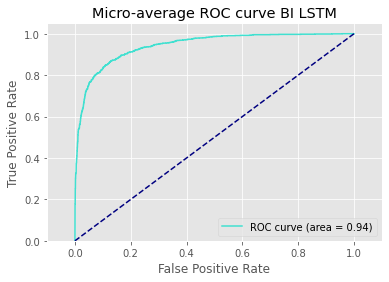

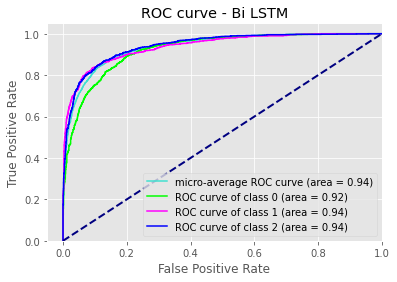

In [ ]:
plt.style.use('ggplot')

#ww = label_binarize(y1, classes=[0, 1, 2])
n_classes = 3
Y_BIN=label_binarize(integer_encoded2, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_BIN[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_BIN.ravel(), probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

color = ['yellowgreen', 'maroon', 'lightblue']

# Plot of a ROC curve for a specific class
plt.figure()

plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2],
         color='turquoise', lw=1.5)
plt.plot([0, 1], [0, 1], 'k--',color='navy')
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC curve BI LSTM')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure(facecolor="w")
plt.plot(fpr["micro"], tpr["micro"],color='turquoise',
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))


for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_BIN[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['lime', 'magenta', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'r--', lw=2,color='navy')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Bi LSTM')
plt.legend(loc="lower right",fontsize=10)


plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
##Keras has implemented some functions for getting or setting weights for every layer. 
#layer.get_weights(): returns the weights of the layer as a list of Numpy arrays.
#for layer in model.layers:
    #weights = layer.get_weights() 
max_len = 409
max_words = 17666
emb_dim = 100

class attention(Layer):
    
    def __init__(self, return_sequences=False):
        self.return_sequences = return_sequences
        super(attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)
    
    def get_config(self):
            cfg = super().get_config()
            return cfg    

model7 = Sequential()
model7.add(Embedding(max_words,emb_dim,weights=[embedding_matrix], input_length=max_len))
model7.add(Bidirectional(LSTM(64, return_sequences=True,dropout=0.4, 
                              recurrent_dropout=0.4)))
model7.add(attention(return_sequences=False)) # return_sequences=False
model7.add(Dropout(0.4))
model7.add(Dense(3, activation='softmax',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))

model7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model7.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 409, 100)          1766600   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 409, 128)          84480     
_________________________________________________________________
attention_3 (attention)      (None, 128)               537       
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 1,852,004
Trainable params: 1,852,004
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history7=model7.fit(x_train, y_train,
 batch_size=100,
 epochs=40,
 validation_data=(x_val, y_val),
 callbacks=[es])



Epoch 1/40
157/157 [==============================] - 313s 2s/step - loss: 1.0182 - accuracy: 0.4993 - val_loss: 0.8834 - val_accuracy: 0.6154
Epoch 2/40
157/157 [==============================] - 315s 2s/step - loss: 0.8608 - accuracy: 0.6270 - val_loss: 0.7995 - val_accuracy: 0.6869
Epoch 3/40
157/157 [==============================] - 313s 2s/step - loss: 0.7116 - accuracy: 0.7103 - val_loss: 0.6527 - val_accuracy: 0.7469
Epoch 4/40
157/157 [==============================] - 313s 2s/step - loss: 0.5667 - accuracy: 0.7861 - val_loss: 0.5863 - val_accuracy: 0.7699
Epoch 5/40
157/157 [==============================] - 314s 2s/step - loss: 0.4549 - accuracy: 0.8348 - val_loss: 0.5620 - val_accuracy: 0.7858
Epoch 6/40
157/157 [==============================] - 316s 2s/step - loss: 0.3791 - accuracy: 0.8634 - val_loss: 0.5759 - val_accuracy: 0.7891
Epoch 7/40
157/157 [==============================] - 315s 2s/step - loss: 0.3243 - accuracy: 0.8875 - val_loss: 0.5729 - val_accuracy: 0.8054

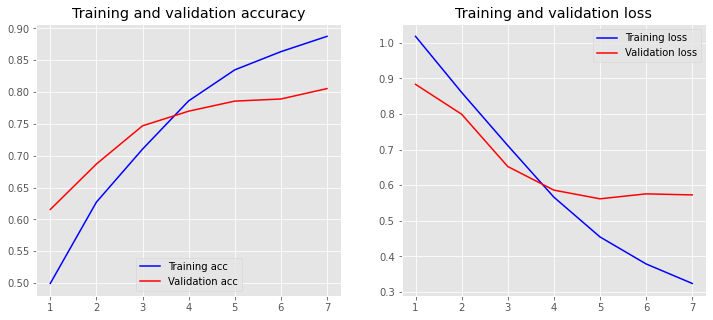

In [ ]:
plot_history(history7)

       names  train  test
0   Baseline   0.40  0.40
1         LG   0.75  0.74
2         NB   0.75  0.74
3        CNN   0.78  0.78
4       LSTM   0.81  0.81
5    BI LSTM   0.81  0.81
6  ATTENTION   0.80  0.80


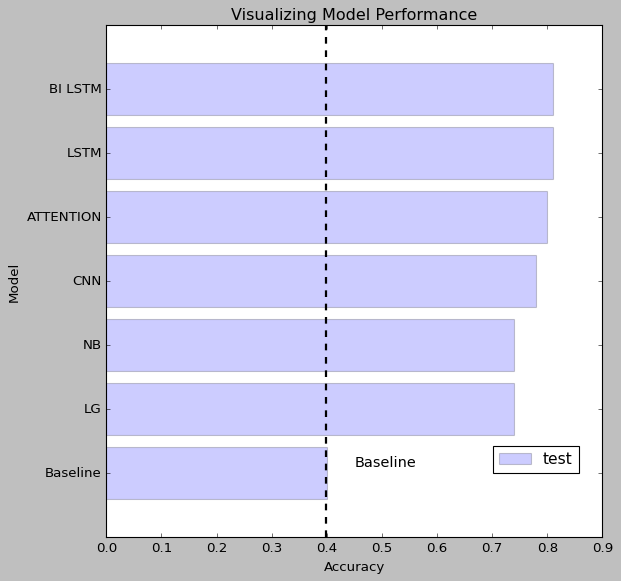

In [ ]:
names = ['Baseline',
        'LG',
        'NB',
        'CNN',
        'LSTM',
        'BI LSTM',
        'ATTENTION']
train = [0.40,
       0.75,
       0.75,
       0.78,
       0.81,
       0.81,
       0.80]
test = [0.40,
       0.74,
       0.74,
       0.78,
       0.81,
       0.81,
       0.80]

accuracy_dct = dict(zip(names, train))

accuracy_df = pd.DataFrame(list(accuracy_dct.items()), columns = ['names','train'])
accuracy_df['test'] = test
print(accuracy_df)

# plot as bar chart

names = accuracy_df['names']

# sort importances
indices = np.argsort(accuracy_df['test'])

# plot as bar chart
fig = plt.figure(figsize=(8, 8))
#plt.barh(np.arange(len(names)), accuracy_df['train'][indices], alpha = .3,color = '#6d904f', label = 'train')
plt.barh(np.arange(len(names)), accuracy_df['test'][indices], alpha = .2, color = 'b', label = 'test')
plt.yticks(np.arange(len(names)), np.array(names)[indices], size=12)
plt.xticks(size=12)
_ = plt.ylabel('Model')
_ = plt.xlabel('Accuracy')
_ = plt.title('Visualizing Model Performance')
plt.axvline(x=0.399, color='black', linestyle='--', lw=2)
plt.text(0.45, 0.1, 'Baseline',
        color='black', fontsize=13)
plt.legend(loc=(.78, .125), fontsize=14)